# A slightly modified implementation of graph traversal

The code with the last assignment is slightly modified; the old code did not give the correct answer for depth-first traversal.

Note that there is only a one-line difference between DFS and BFS algorithms (pop vs. popleft).

In [9]:
from collections import deque
def traversal(G, root, algorithm):
    r"""
    Return a traversal of ``G`` starting with root node ``r`` using DFS or BFS.
    
    INPUT:
    
    ``G`` - a graph or directed graph
    ``r`` - a node of ``G``
    ``algorithm`` - 'DFS' or 'BFS'
    """
    T = Graph()
    n = root
    traversal = [n]
    can_visit = deque(G.neighbors(n))
    while can_visit: # this runs so long as can_visit is non-empty
        if algorithm == 'DFS':
            m = can_visit.pop()
        elif algorithm == 'BFS':
            m = can_visit.popleft()
        else:
            raise ValueError('algorithm should be DFS or BFS')
        if m in traversal:
            pass
        else:
            n = m
            traversal.append(n)
            can_visit.extend([v for v in G.neighbors(n) if not(v in traversal)])
    return traversal


### We see a depth-first traversal for the Petersen graph:

[0, 5, 8, 6, 9, 7, 2, 3, 4, 1]


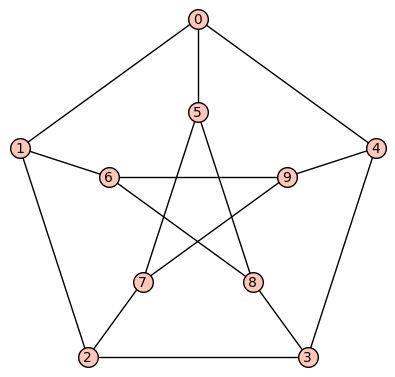

In [10]:
G = graphs.PetersenGraph()
print traversal(G, 0, algorithm="DFS"); G.show()

## Traversal algorithms can be modified to look for cycles:

In [12]:
def has_cycle(G, root=0, algorithm="DFS"):
    r"""
    Check if the connected component of ``root`` in ``G`` has a loop.
    
    INPUT:
    
    ``G`` - a graph or directed graph
    ``r`` - a node of ``G``
    ``algorithm`` - 'DFS' or 'BFS'
    """
    n = root
    traversal = [n]
    can_visit = deque(G.neighbors(n))
    while can_visit: # this runs so long as can_visit is non-empty
        if algorithm == 'DFS':
            m = can_visit.pop()
        elif algorithm == 'BFS':
            m = can_visit.popleft()
        else:
            raise ValueError('algorithm should be DFS or BFS')
        if m in traversal:
            return True
        else:
            n = m
            traversal.append(n)
            can_visit.extend([v for v in G.neighbors(n) if not(v in traversal)])
    return False
        


In [13]:
G = graphs.FibonacciTree(15)

In [14]:
has_cycle(G)

False

In [15]:
G = graphs.PetersenGraph(); has_cycle(G)

True

## Edge weights

Edge weights in a graph may be stored as edge labels. In the following cell we assign random weights to the edges of the ``PetersenGraph``:

In [19]:
[G.set_edge_label(e[0], e[1], random()) for e in G.edges()]; G.edge_labels()

[0.9100765725427638,
 0.39732878705147767,
 0.6877909259118239,
 0.2799166223114692,
 0.09883241548884614,
 0.8862311969988623,
 0.23257615198695292,
 0.04186526045701122,
 0.9704164074345353,
 0.33415337136992984,
 0.866128336647283,
 0.822249159649837,
 0.26272976127602243,
 0.5317530745938294,
 0.036036016510388014]

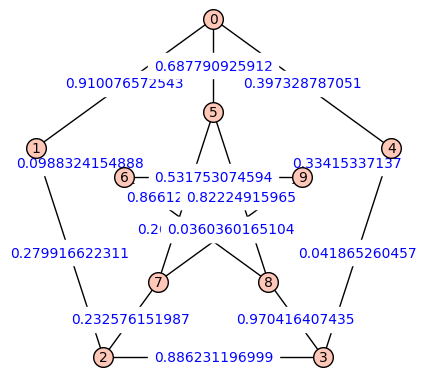

In [20]:
G.show(edge_labels=True)

In [26]:
G.shortest_path(0, 7, by_weight=True)

[0, 4, 9, 7]

The above method uses **Dijkstra's algorithm** for determining the shortest path between two nodes in a network with weighted edges. In this context, the length of a path is the sum of the weights of its edges. For more information, see https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm

In [27]:
G.distance(0, 2)

2